In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("vendas_tratadas.xlsx")
print(df)

          Data         Loja         Categoria          Produto  \
0   2024-07-20  Vento Norte  eletrodomesticos        Aquecedor   
1   2024-05-30  Vento Norte           sazonal     Guarda-chuva   
2   2024-01-25  Vento Norte            roupas            Calça   
3   2024-07-10  Chuva Clara            roupas           Casaco   
4   2024-08-31    Porto Sol           sazonal    Manta térmica   
..         ...          ...               ...              ...   
402 2024-08-23    Porto Sol  eletrodomesticos       Ventilador   
403 2024-12-19  Vento Norte  eletrodomesticos       Ventilador   
404 2024-05-12    Vila Neve          infantil   Blusa Infantil   
405 2024-03-08    Vila Neve  eletrodomesticos  Ar-condicionado   
406 2024-07-25  Vento Norte           sazonal     Guarda-chuva   

     Valor Unitário  Quantidade  Valor_venda  
0             81.11           5       405.55  
1            477.70           6      2866.20  
2            411.59           8      3292.72  
3            258.99

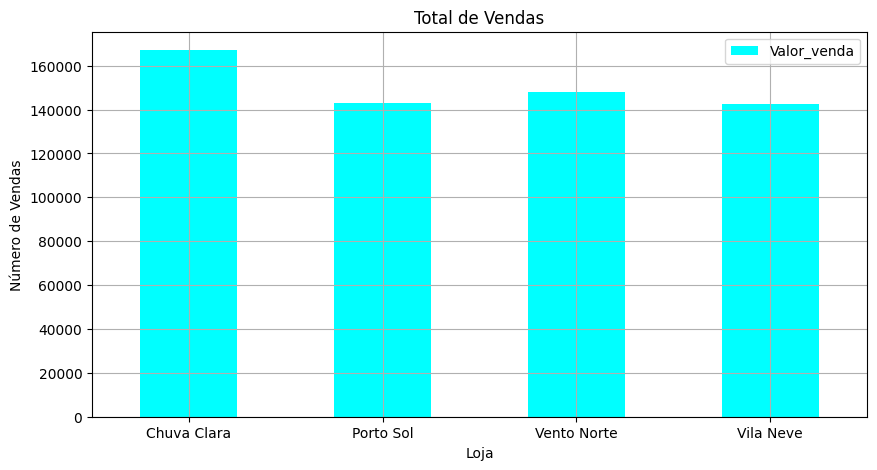

In [86]:
# 1. Total de vendas por loja - Agrupar por loja e somar o valor total vendido
plt.figure(figsize=(10,5))

vendas_por_loja = df.groupby('Loja')['Valor_venda'].sum()
vendas_por_loja.plot(kind='bar', color='Cyan')

plt.title('Total de Vendas')

plt.xlabel('Loja')
plt.ylabel('Número de Vendas')


plt.grid(True)
plt.xticks(rotation=360)
plt.legend()

# Mostrar o gráficos
plt.show()

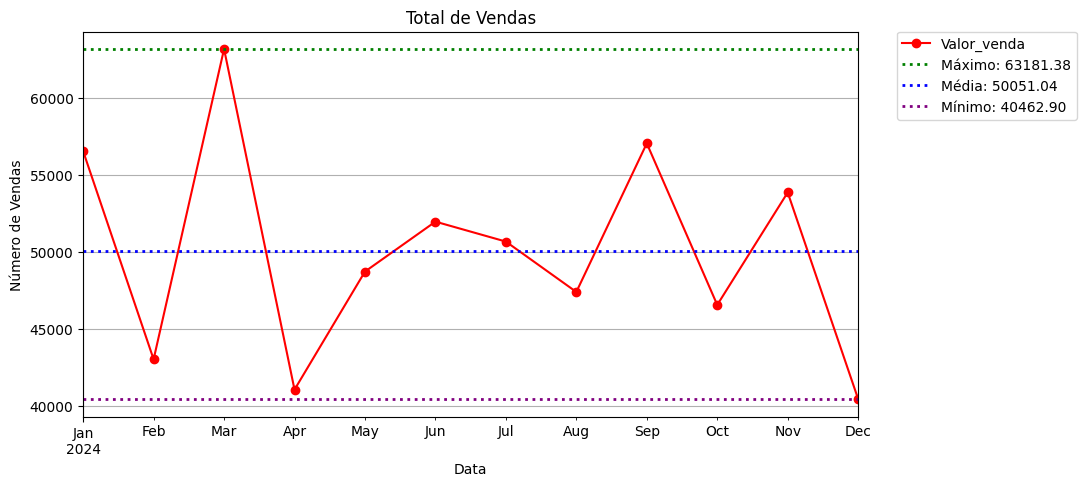

In [125]:
# 2. Evolução mensal de vendas -  Identificar sazonalidades e picos mensais.
plt.figure(figsize=(10,5))
df['ano_mes'] = df['Data'].dt.to_period('M')
vendas_por_mes = df.groupby('ano_mes')['Valor_venda'].sum()
vendas_por_mes.plot(marker='o', linestyle='-', color='red')

plt.axhline(y=vendas_por_mes.max(), 
            color='green', 
            linestyle=':', 
            linewidth=2, 
            label=f"Máximo: {vendas_por_mes.max():.2f}")

plt.axhline(y=vendas_por_mes.mean(), 
            color='blue', 
            linestyle=':', 
            linewidth=2, 
            label=f"Média: {vendas_por_mes.mean():.2f}")

plt.axhline(y=vendas_por_mes.min(), 
            color='purple', 
            linestyle=':', 
            linewidth=2, 
            label=f"Mínimo: {vendas_por_mes.min():.2f}")

plt.title('Total de Vendas')

plt.xlabel('Meses')
plt.ylabel('Número de Vendas')

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Mostrar o gráficos
plt.show()

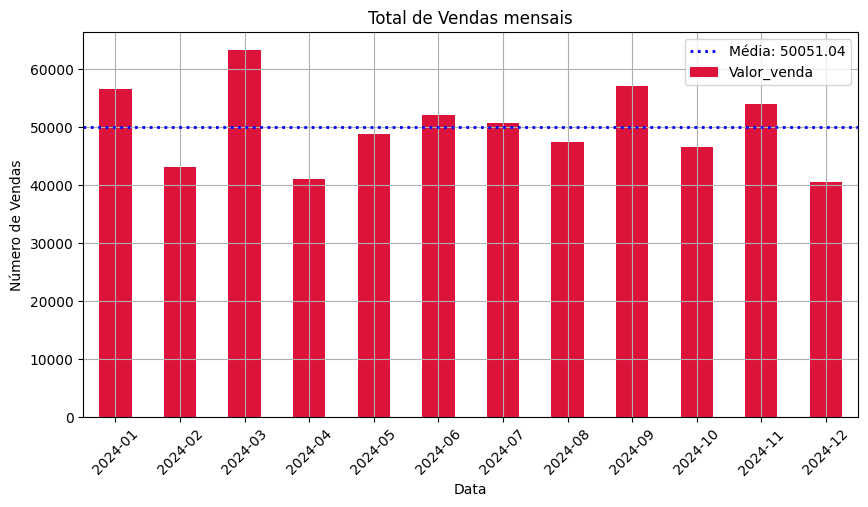

In [126]:
# 3. Agrupar por mês e somar vendas
plt.figure(figsize=(10,5))
df['ano_mes'] = df['Data'].dt.to_period('M')
vendas_por_mes = df.groupby('ano_mes')['Valor_venda'].sum()
vendas_por_mes.plot(kind='bar', color='crimson')

plt.title('Total de Vendas mensais')

plt.xlabel('Meses')
plt.ylabel('Número de Vendas')

plt.axhline(y=vendas_por_mes.mean(), 
            color='blue', 
            linestyle=':', 
            linewidth=2, 
            label=f"Média: {vendas_por_mes.mean():.2f}")


plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Mostrar o gráficos
plt.show()

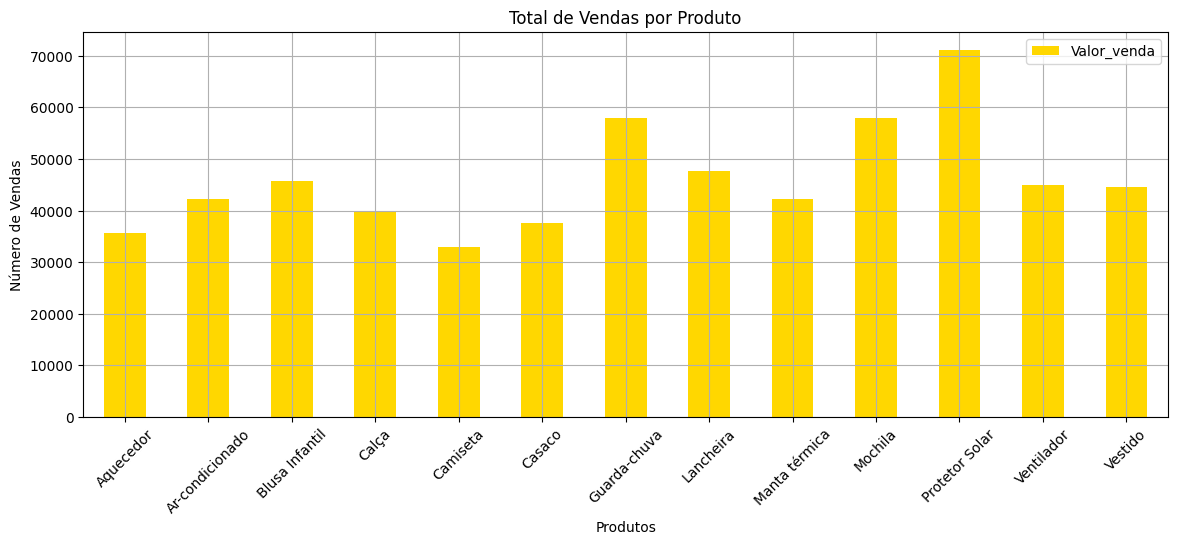

In [130]:
# 4. Produtos mais vendidos (por volume) Objetivo: saber o que mais sai no caixa.
plt.figure(figsize=(14,5))
vendas_por_mes = df.groupby('Produto')['Valor_venda'].sum()
vendas_por_mes.plot(kind='bar', color='gold')

plt.title('Total de Vendas por Produto')
plt.xlabel('Produtos')
plt.ylabel('Número de Vendas')


plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Mostrar o gráficos
plt.show()

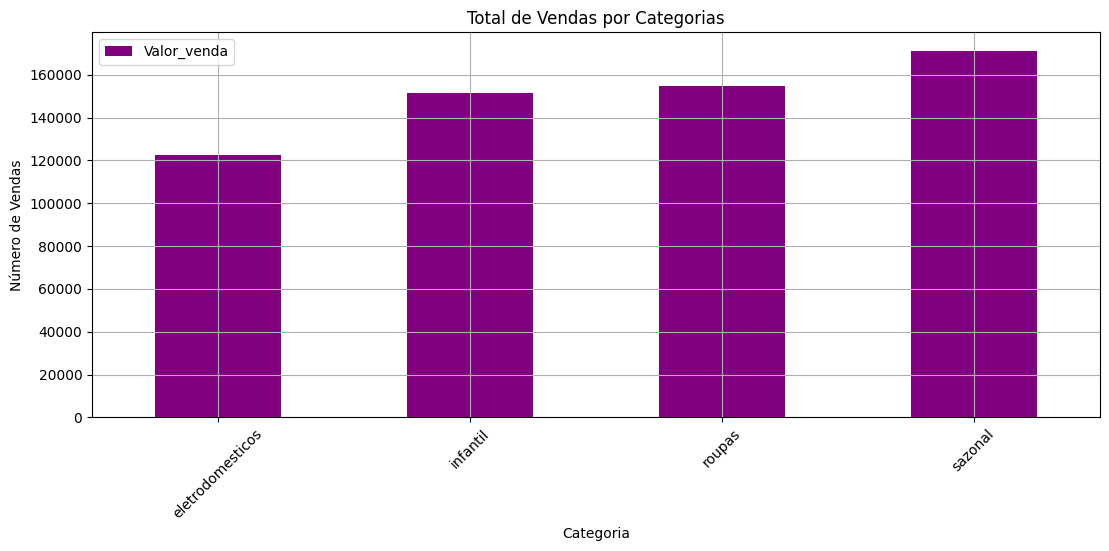

In [ ]:
# 5. Comparação entre categorias. Objetivo: analisar quais categorias são mais lucrativas.
plt.figure(figsize=(13,5))
vendas_por_categorias = df.groupby('Categoria')['Valor_venda'].sum()
vendas_por_categorias.plot(kind='bar', color='purple')

plt.title('Total de Vendas por Categorias')
plt.xlabel('Categoria')
plt.ylabel('Número de Vendas')


plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Mostrar o gráficos
plt.show()


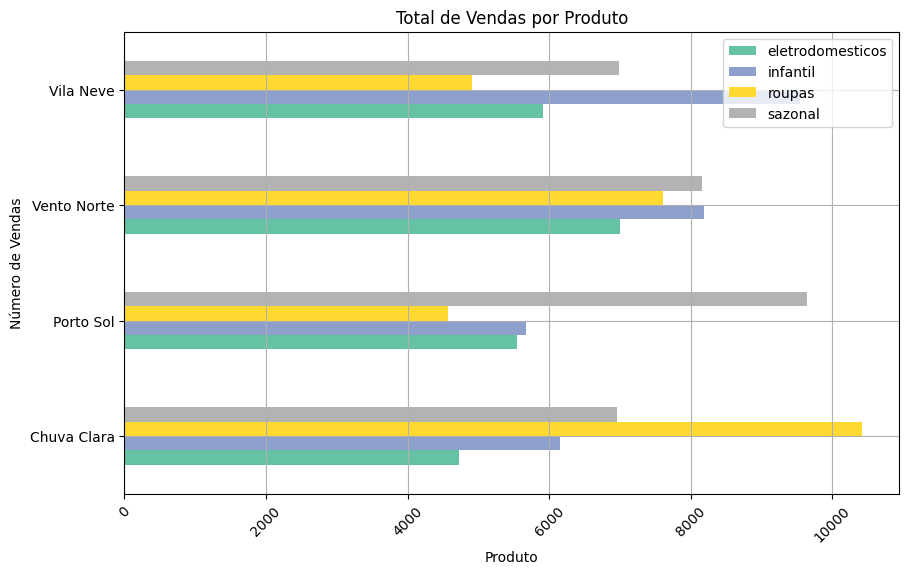

In [ ]:
# 7 6. Comparação entre lojas por categoria. Objetivo: avaliar se há especialização ou foco
# diferente entre as lojas, com base nas categorias que mais vendem.
comparacao = df.groupby(['Loja', 'Categoria'])['Valor Unitário'].sum().reset_index()

tabela_pivot = comparacao.pivot(index='Loja', columns='Categoria', values='Valor Unitário')
tabela_pivot.plot(kind='barh', figsize=(10,6), colormap='Set2')

plt.title('Total de Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Número de Vendas')


plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Mostrar o gráficos
plt.show()
